# Tunnelling in a quantum system

One of the most striking results of quantum mechanics is the tunnel effect, namely the possibility for a matter particle to behave like a wave and to pass (at least partially!) through a potential barrier, which could not be classically crossed.

In this exercise, we will see how this is possible and can be simulated in 1D.

## A *very* quick introduction to quantum mechanics

In the quantum world, the state of a particle is no more described simply by a coordinate function $\mathbf{x}(t)$, specifying its position at time $t$, but by a *wave-function* $\psi(\mathbf{x}, t)$, which tells what is the **amplitude** of the particle at time $t$ in the position $\mathbf{x}$.

The quantity $\psi(\mathbf{x}, t)$ is actually a *complex* function, having both a real and an imaginary part: if one wants to know where the particle is, one can compute the square modulus of $\psi$ which tells what is the **probability** $P(\mathbf{x}, t)$ 

\begin{equation}
P(\mathbf{x}, t) = \left|\psi(\mathbf{x}, t)\right|^2
\end{equation}

of finding the particle in a specific position at a specific time $t$.

Since the particle must be somewhere, for $P$ to be a true probability it is necessary that its integral over the whole space is $1$: for instance, in 1D one should have

\begin{equation}
\int_{-\infty}^{+\infty} P(x, t) d x = 1
\end{equation}

Suppose that we know the function $\psi$ at a certain time $t$, and we assume it represents a particle of mass $M$. How do we compute its evolution in time? For instance, under the action of a certain potential energy $V(\mathbf{x})$ ? By means of the Schrödinger equation

\begin{equation}
i\hbar\frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2 M}\nabla^2 \psi + V(\mathbf{x}) \psi
\end{equation}

which is a partial differential equation, of the first order in time and of the second order in space. Note that $i$ is the imaginary unit, $i=\sqrt{-1}$.

The operator $\nabla^2$ is simply a second order derivative, for instance in 2 dimensions

\begin{equation}
\nabla^2 \psi = \frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2}\ .
\end{equation}

The quantity $\hbar = \frac{h}{2\pi} \simeq 1.054\times 10^{-34} J\cdot s$ is the reduced Planck constant (reduced because of the division by $2\pi$)  
We have seen similar equations already, for instance the diffusion equation: but the difference here is that $\psi$ is complex, and because of the $i$ term in the time derivative, we have a different behaviour of the solution.

## Exact solution for $V=0$

Suppose that a particle of mass $M$ moves in one dimension, say from left to right, in a region where the potential $V(\mathbf{x}) = 0$. Then the Schrödinger equation simplifies into

\begin{equation}
i\hbar\frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2 M}\frac{\partial^2 \psi}{d x^2}
\end{equation}

and it is possible to show that a solution (among infinitely many possible ones) is of the form

\begin{equation}
\psi(x, t)=\sqrt{\frac{\sigma_0}{\sqrt{2\pi}}}\left[\frac{\exp \left(-\frac{\left(x-\frac{p_0 t}{M}\right)^2}{4 \left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}\right)}{\sqrt{\left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}}\right]\exp\left(\frac{i \left(p_0 x-\frac{p_0^2 t}{2 M}\right)}{\hbar}\right)
\end{equation}

The factor in square parantheses represents a gaussian wave-packet, whose maximum moves with time, towards larger $x$ values, with a "group velocity" $v_g=\frac{p_0}{M}$, and whose (complex) width

\begin{equation}
\sigma^2(t) = \sigma_0^2 + \frac{i t\hbar}{2 M}
\end{equation}

grows with time. Note that $\sigma_0$ has the dimensions of a length; it represents the dispersion in the initial position of the particle.

The other exponential factor represents a plane wave which oscillates with a phase velocity which is half the group velocity. 

The probability for a particle to be at position $x$ is given as we said by

\begin{equation}
P(x,t)=\left|\psi(x,t)\right|^2=\frac{\sigma_0}{\sqrt{2\pi}}\frac{\exp \left(-\frac{\sigma_0^2
   (x -\frac{p_0 t}{M})^2}{2 \left(\sigma_0^4 +\frac{t^2 \hbar^2}{4 M^2}\right)}\right)}{\sqrt{\sigma_0^4+\frac{t^2 \hbar^2}{4 M^2}}}
\end{equation}

which shows that the maximum of the probability moves with the group velocity, and the width of the probability distribution grows with time as expected.

This exact solution (for $V=0$) will come handy later. Let's now see how to simulate in general.

## Simulating in time

We will try to simulate the evolution of the waveform using a simple forward difference in time, and a central scheme in space: in other words, we will introduce the following two approximations

\begin{eqnarray}
\frac{\partial\psi(x,t)}{\partial t} &\simeq& \frac{\psi(x,t+\Delta t) - \psi(x,t)}{\Delta t}\\
\frac{\partial^2\psi(x,t)}{\partial x^2} &\simeq& \frac{\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x, t)}{\left(\Delta x\right)^2}
\end{eqnarray}

the only additional difficulty, with respect to the diffusion equation case, is that we have now to deal with complex numbers.

You have two options here: either you just work with complex numbers, or you write two separate, coupled equations for the real and imaginary parts

\begin{equation}
\psi(x,t) = \psi_R(x,t) + i \psi_I(x,t)
\end{equation}

hence

\begin{eqnarray}
\hbar \frac{\partial\psi_R(x,t)}{\partial t} &=& -\frac{\hbar^2}{2 M}\frac{\partial^2\psi_I(x,t)}{\partial x^2} + V(x)\psi_I(x,t)\\
\hbar \frac{\partial\psi_I(x,t)}{\partial t} &=& +\frac{\hbar^2}{2 M}\frac{\partial^2\psi_R(x,t)}{\partial x^2} - V(x)\psi_R(x,t)\ .
\end{eqnarray}

Either way (using $\psi$ complex, or using $\psi_R$ and $\psi_I$), it is now possible to set up a simulation code.

## Assignment 0: write down code

Write down a *structured* code (or a class) for simulating the time evolution of the waveform over time. The code should be written according to the following general specifications:
* the state of the waveform should be represented by the values of the complex amplitude $\psi$ defined using a complex `numpy` array. The size of the array should be a parameter for any function using the array. If using a class, clearly $\Delta x$ could be a useful class element.
* A method should allow setting the initial values in the array by means of a defined function, and the $\Delta x$ value chosen for the discretization.
* A method should allow evolving by one step the values of $\psi$, taking as parameters the time step $\Delta t$, the discretization step $\Delta x$, the mass $M$ and a function $V(x)$ representing the potential.
* A method should allow computing the probability distribution $P(x,t)$.
* A method should allow plotting the probability distribution, and the real and imaginary parts of $\psi$.
* A method should allow integrating $P(x,t)$ over $d x$, for instance to check the normalization. 

Use zero boundary conditions: that is $\psi=0$ at the boundary.

### Resolution 0

#### Importing Libreries

First of all, we can import the needed libreries for our simulation.

In [ ]:
import numpy as np
import sympy as sp

# import numba
# from numba import jit

from sympy import init_printing
from sympy.utilities.lambdify import lambdify

from scipy.integrate import simpson

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#### Defining the Waveform Class
In order to generate a model of the waveform and to provide the needed methods, we want to define a class.

So, following the specifications of Assignment 0, let's define the attributes and the methods describes above.

In [182]:
# Class for simulating the time evolution of the waveform over time
class Waveform:

  def __init__(self, psi0):
    """Waveform model
       
    Sets the values of the wave's state and the dx choosen for the discretization.

    Parameters
    -------------------
    psi0 : 1D numpy array of complex
            Vector for storing the initial state of the waveform
    dx  : float
            Discretization step in space

    Class Attributes
    -------------------
    psi : 1D numpy array of complex
            Vector for storing the state of the waveform at a certain time step
    """

    self.psi = psi0.copy()


  def compute_probability(self):
    """Compute probability distribution in a certain time step of psi.

    Return
    -------------------
    P : 1D numpy array of float
         Represents the probability of finding the particle
         in a specific position at a specific time
    """
    self.P = np.abs(self.psi)**2
    return self.P
  
  
  def plot(self, x, mode=0, **kwargs):
    """Allows to plot the probability distribution, the real and the imaginary parts of psi.

    Parameter
    -------------------
    x    : 1D numpy array of float
            Represents the discretized space grid
    mode : int
            Option that allows to choose if:
              - (defult = 0) plot both probability and real and imaginary parts
              - (1) plot only the probability distribution
              - (2) plot both real and imaginary parts
              - (3) plot only real part
              - (4) plot  only imaginary part
    """

    
    fig = plt.figure(figsize=(19, 5))

    if(mode == 0):
      plt.title("Comparing properties of $\psi$")
      plt.xlabel("$x$")
      plt.plot(x, self.P, "g-", label=r"$P(x, t) = |\psi|^2$")
      plt.plot(x, self.psi.real, "r-", label="$\psi_R$ real")
      plt.plot(x, self.psi.imag, "b-", label="$\psi_I$ imaginary")
    
    elif(mode == 1):
      plt.title("Probability of $\psi$")
      plt.xlabel("$x$")
      plt.ylabel("$|\psi|^2$")
      plt.plot(x, self.P, "g-", label="$P(x, t) = |\psi|^2$")
    
    elif(mode == 2):
      plt.title("Real and Imaginary parts of $\psi$")
      plt.xlabel("$x$")
      plt.ylabel("$\psi$")
      plt.plot(x, self.psi.real, "r-", label="$\psi_R$ real")
      plt.plot(x, self.psi.imag, "b-", label="$\psi_I$ imaginary")

    elif(mode == 3):
      plt.title("Real part of $\psi$")
      plt.xlabel("$x$")
      plt.ylabel("$\psi_R$")
      plt.plot(x, self.psi.real, "r-", label="$\psi_R$ real")

    elif(mode == 4):
      plt.title("Imaginary part of $\psi$")
      plt.xlabel("$x$")
      plt.ylabel("$\psi_I$")
      plt.plot(x, self.P, "b-", label=r"$\psi_I$ imaginary")
    
    elif(mode == 5):
      plt.title("Behavior of $\psi$ with V={}".format(kwargs.get('V0')))
      plt.xlabel("$x$")
      plt.plot(x, kwargs.get('V'), "b--", label=r"$V$")
      plt.plot(x, self.psi.real, "r--", label=r"$\psi_R$")

    plt.legend(loc=1, fontsize=16)


  def check_probability(self, dx):
    """Compute the total probability distribution integrating over dx.

    Parameters
    -------------------
    dx : float
          Integration step

    Return
    -------------------
    P_tot : float
            Total probability distribution
    """

    P_tot = np.sum(np.abs(self.psi)**2)*dx
    
    return P_tot


Now we have defined the class. Note that we miss a method: the implementetion of the evolution scheme. Let's write it down below.

Recall the time-dependant Schrödinger equation:

\begin{equation}
i\hbar\frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2 M}\nabla^2 \psi + V(x) \psi
\end{equation}

which is a parabolic PDE because of the first order in time and of the second order in space.

Then, we said that we want to use a forward difference in time and a central scheme in space, and we introduced the following approximation:
we will introduce the following two approximations

\begin{eqnarray}
\frac{\partial\psi(x,t)}{\partial t} &\simeq& \frac{\psi(x,t+\Delta t) - \psi(x,t)}{\Delta t}\\
\frac{\partial^2\psi(x,t)}{\partial x^2} &\simeq& \frac{\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x, t)}{\left(\Delta x\right)^2}
\end{eqnarray}

Now we can write down the equation discretized form by substituting the derivates in both time and space with the approximations defined above, that is

\begin{equation}
i\hbar\frac{\psi(x,t+\Delta t) - \psi(x,t)}{\Delta t}=-\frac{\hbar^2}{2 M}\frac{\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x, t)}{\left(\Delta x\right)^2} + V(x) \psi(x, t)
\end{equation}

which we can re-write using "stencil notation" as follow

\begin{equation}
i\hbar\frac{\psi^{n+1}_{i} - \psi^{n}_{i}}{\Delta t}=-\frac{\hbar^2}{2 M}\frac{\psi^{n}_{i+1} - 2 \psi^{n}_{i} + \psi^{n}_{i-1}}{\left(\Delta x\right)^2} + V(\mathbf{x}) \psi^{n}_{i}
\end{equation}


Now, we can isolate the term $\psi^{n+1}_{i}$ and in order to get the expression to use in the evolution scheme

\begin{equation}
\psi^{n+1}_{i} = \psi^{n}_{i} + i\frac{\hbar\,\Delta t}{2 M\,\left(\Delta x\right)^2}(\psi^{n}_{i+1} - 2 \psi^{n}_{i} + \psi^{n}_{i-1}) - i\frac{\Delta t}{\hbar}V(\mathbf{x})\psi^{n}_{i}
\end{equation}

Another consideration to do is: in order to avoid to work with complex numbers we can write two separate, coupled equations for the real and imaginary parts

\begin{eqnarray}
\hbar \frac{\partial\psi_R(x,t)}{\partial t} &=& -\frac{\hbar^2}{2 M}\frac{\partial^2\psi_I(x,t)}{\partial x^2} + V(x)\psi_I(x,t)\\
\hbar \frac{\partial\psi_I(x,t)}{\partial t} &=& +\frac{\hbar^2}{2 M}\frac{\partial^2\psi_R(x,t)}{\partial x^2} - V(x)\psi_R(x,t)
\end{eqnarray}

hence

\begin{eqnarray}
\psi^{n+1}_{R,i} = \psi^{n}_{R,i} - \frac{\hbar\,\Delta t}{2 M\,\left(\Delta x\right)^2}(\psi^{n}_{I,i+1} - 2 \psi^{n}_{I,i} + \psi^{n}_{I,i-1}) + \frac{\Delta t}{\hbar}V(\mathbf{x})\psi^{n}_{I,i} \\
\psi^{n+1}_{I,i} = \psi^{n}_{I,i} + \frac{\hbar\,\Delta t}{2 M\,\left(\Delta x\right)^2}(\psi^{n}_{R,i+1} - 2 \psi^{n}_{R,i} + \psi^{n}_{R,i-1}) - \frac{\Delta t}{\hbar}V(\mathbf{x})\psi^{n}_{R,i}
\end{eqnarray}

In [183]:
class Waveform(Waveform):
  #@jit(nopython=True)
  def ftcs(self, nt, dt, dx, M, hbar, alpha, V):
    """Evolve one by one step the values of psi using 
       forward-time/central-space scheme.

    Parameters
    -------------------
    nt     : int
              Number of time steps
    dt     : float
              Time step dimension
    dx     : float
              Discretization step in space
    M      : float
              Mass of the particle
    alpha  : float
              Diffusion coefficient
    hbar   : float
              Reduced Planck constant
    V      : 1D numpy array of float
              Represents the potential field

    Boundary Condition
    -------------------
    Using zero boundary conditions: that is psi is fixed to zero at the boundary.
        ->    psi[0] = psi[-1] = 0
    """
    
    for n in range(nt):
      psi_n = self.psi.copy()
      # saving values for operations
      psi_n_real = self.psi.real.copy()
      psi_n_imag = self.psi.imag.copy()

      # starting evolution operations
      self.psi.real[1:-1] = psi_n_real[1:-1]\
                            - alpha*(dt/dx**2)*(psi_n_imag[2:] - (2*psi_n_imag[1:-1]) + psi_n_imag[:-2])\
                            + (V[1:-1]*psi_n_imag[1:-1])*(dt/hbar)
      self.psi.imag[1:-1] = psi_n_imag[1:-1]\
                            + alpha*(dt/dx**2)*(psi_n_real[2:] - (2*psi_n_real[1:-1]) + psi_n_real[:-2])\
                            - (V[1:-1]*psi_n_real[1:-1])*(dt/hbar)

      # Dirichlet zero boundary conditions
      self.psi[0] = self.psi[-1] = 0

## Assignment 1: check the code

Since we have an analytical solution for the case $V=0$, let us exploit it to check that what we have written is correct.
We will assume that at $t=0$ the waveform has the shape

\begin{equation}
\psi(x, t)=\left[\frac{\exp \left(-\frac{(x-x_0)^2}{4 \sigma_0^2}\right)}{\sqrt{2\pi\sigma_0}}\right]\exp\left(\frac{i\,p_0 \left(x-x_0\right)}{\hbar}\right)
\end{equation}

where $x_0=10^{-1} m$ and $M=10^{-30} kg$ (about the electron mass). Further, we assume that the particle has a speed $v_g= 10^{-1} m\,s^{-1}$, which corresponds to $p_0 = v_g\cdot M = 10^{-31} kg\, m\, s^{-1}$.

We choose for the initial dispersion the value $\sigma_0 \simeq 2\times 10^{-2} m$ and we let the waveform evolve for $T=8 s$. Recalling the formula for $\sigma^2(t)$

\begin{equation}
\sigma^2(t) = \sigma_0^2 + \frac{i t \hbar}{M} = 4\times 10^{-4} m^2 + i\,t\,10^{-4} m^2 s^{-1}
\end{equation}

one can see that the width will roughly grow by $\sqrt{3}$.

The central position will move by about $L=T\, v_g\simeq 8\times 10^{-1} m$: hence we need an array covering sufficient space, say from $x=0$ to $x=1 m$  with a spacing (say) $\Delta x\sim 10^{-4} m$.

In simulating, beware of the CFL condition, which sets a requirement on the time step $\Delta t$ to ensure numerical stability.

Once obtained the evolved waveform:
* compare, in norm $L_2$, the solution found with the exact solution that we have obtained in the previous formulas.
* Repeat the comparison for different $\Delta t$ values and check the convergence.

The method we have adopted is naive, so it might be affected by numerical instabilities. A more sophisticated and stable method is referenced at the end.

### Resolution 1

#### Initial Conditions

In order to set up the simulation, the first thing we're going to do is to write down the initial conditions and all those costants we need, such as the imaginary unit `i` or the reduced Planck costant `hbar`.

Note that in `Python` we must use the `j` notation to represent a complex number, so `1j` for $i = \sqrt{-1}$.

In [139]:
#Problem Setup & Initial Conditions

i      = 1j                           # imaginary unit
hbar   = 1.054e-34                    # reduced Planck constant

x0     = 0.1                          # initial central wave position
M      = 1e-30                        # particle mass
vg     = 1e-1                         # group velocity
p0     = 1e-31                        # momentum vg*M
sigma0 = 2e-2                         # initial wave dispersion

T      = 8                            # time duration of simulation

dx     = 0.0013                       # space discretization step
x_vec  = np.arange(0, 1+dx, dx)       # spatial discretized grid 
nx     = len(x_vec) - 1               # number of spatial grid points

# time-dependent particle's dispertion during the simulation
def sigma(sigma0, t, hbar, M): 
  return (sigma0**2)+((i*t*hbar)/2*M)

Now, we can recall

\begin{equation}
\psi(x, t)=\left[\frac{\exp \left(-\frac{(x-x_0)^2}{4 \sigma_0^2}\right)}{\sqrt{2\pi\sigma_0}}\right]\exp\left(\frac{i\,p_0 \left(x-x_0\right)}{\hbar}\right)
\end{equation}

and based on that (and of course on initial conditions), let's implement in code the initial shape of the waveform at time $t=0$ and potential field $V(x)=0$. 

In [140]:
# initial shape of the waveform
# psi0 = ((np.exp(-(x_vec-x0)**2/(4*(sigma0**2)))) / (np.sqrt(2*np.pi*sigma0))) * (np.exp((i*p0*(x_vec-x0))/hbar))
psi0 = (np.sqrt((sigma0)/(np.sqrt(2*np.pi))))\
        * ((np.exp(-(x_vec-x0)**2/(4*(sigma0**2)))) / (np.sqrt(sigma0**2)))\
        * (np.exp((i*p0*(x_vec-x0))/hbar))

# Dirichlet zero boundary conditions
psi0[0] = 0
psi0[-1] = 0

# print the result
psi0

array([0.00000000e+000+0.00000000e+000j, 7.51476878e-003-4.44354558e-003j,
       8.00117230e-003-3.75827051e-003j, ...,
       5.28711793e-220-5.58748402e-220j, 5.17640841e-220-4.52301251e-220j,
       0.00000000e+000+0.00000000e+000j])

Just to sanity check, here we plot the `NumPy` array, `psi0`, and we also print the total probability distribution that has to be $\simeq 1$.

In the plot below, we can see how the line represents just the real part of `psi0` beacause it is a complex array so we have to remove the imaginary part when plotting (obviously we can plot also the imaginary part, but it has to be indipendent from the real one).

Total probability distribution: 0.9999997096161429


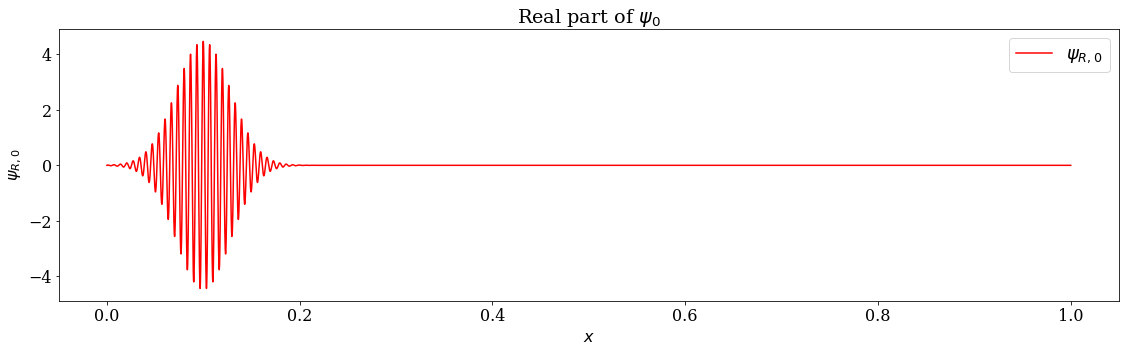

In [141]:
fig = plt.figure(figsize=(19, 5))

plt.title("Real part of $\psi_0$")
plt.xlabel("$x$")
plt.ylabel("$\psi_{R,0}$")
plt.plot(x_vec, np.real(psi0), "r-", label=r"$\psi_{R,0}$")
plt.legend(loc=1, fontsize=18)

print("Total probability distribution: {}".format(np.sum(np.abs(psi0)**2)*dx))

#### Computing Numerical Solution with FTCS Scheme

We have check the correctness of the waveform shape at $t=0$, then we can use this shape as starting point to compute the numerical solution.

We have already seen above what the equation discretized form is, so, now let's define terms for the discretization. We have the space discretized step `dx`, that, according with the Assignment 1, it's equal to $10^{-4} m$. Therefore, we have also the spatial discretized grid and the number of points.

So, what we want to do now is find a proper discretization for the temporal grid. According with the lesson's notebook `02_03`, the CFL condition to enforce in order to keep the solution stable is

\begin{equation}
\alpha \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}

where $\alpha$ is the diffusion coefficient; in our case, we can set $\alpha = \frac{ħ}{2M}$.
We need to find $\Delta t$, so rearrage the expression like this

\begin{equation}
\Delta t \leq \Delta x^2 \frac{M}{ħ}
\end{equation}

and this is the stability condition for a diffusion equation discretized with a FTCS scheme.

In [142]:
# CFL condition for diffusion equation with ftcs
# dt      = (M/hbar) * (dx**2)      # time discretization step  # spatial discretized grid
dt      = 1e-7
nt      = T // dt                   # number of temporal grid points
#nt      = 1_000_000

alpha   = (hbar)/(2*M)              # diffusion coefficient

# Note: if dt = (M/hbar) * (dx**2) and T = 8      =>   nt = T // dt = 80_000_000

It's time to declare our numerical waveform.

In [143]:
# declearing a Waveform object
waveform = Waveform(psi0)

waveform.psi

array([0.00000000e+000+0.00000000e+000j, 7.51476878e-003-4.44354558e-003j,
       8.00117230e-003-3.75827051e-003j, ...,
       5.28711793e-220-5.58748402e-220j, 5.17640841e-220-4.52301251e-220j,
       0.00000000e+000+0.00000000e+000j])

Now we can use the `ftcs` method from the `Waveform` class to compute the next shape in time of the function $\psi(x, t)$. Since we are considering for now the potential field $V(x)=0$, we pass to the function a 1D zero array of the shape of the spatial grid.


In [144]:
waveform.ftcs(nt, dt, dx, M, hbar, alpha, np.zeros(x_vec.shape))

waveform.psi

array([ 0.00000000e+000+0.00000000e+000j,
        2.15532705e-005+2.18449263e-006j,
        4.28059513e-005+6.26124317e-006j, ...,
        7.04563774e-186+1.78742154e-185j,
       -7.35146357e-185+4.97353801e-185j,
        0.00000000e+000+0.00000000e+000j])

We made the waveform shape to evolve, so now we are going to try to plot it.

Total probability distribution: 1.0000222799975063


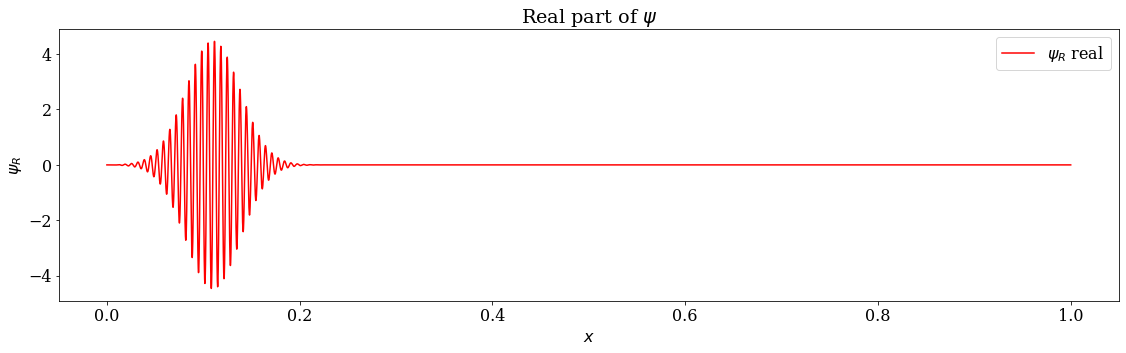

In [146]:
waveform.plot(x_vec, 3)

print("Total probability distribution: {}".format(waveform.check_probability(dx)))

### Writing exact solution with SymPy

We wanto to use the exact solution to check the correctness of the numerical waveform shape and also to evaluate the convergence of the two solutions (numerical and analytical) at different $\Delta t$.

Recall the exact solution equation for $V(x) = 0$:

\begin{equation}
\psi(x, t)=\sqrt{\frac{\sigma_0}{\sqrt{2\pi}}}\left[\frac{\exp \left(-\frac{\left(x-\frac{p_0 t}{M}\right)^2}{4 \left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}\right)}{\sqrt{\left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}}\right]\exp\left(\frac{i \left(p_0 x-\frac{p_0^2 t}{2 M}\right)}{\hbar}\right)
\end{equation}

We'll using the `SymPy` module beacause is easier to check the correctess of the expression that we are going to write down.

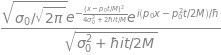

In [147]:
init_printing()

_2pi, x, t, M_, sigma_0, p_0, i_, h_bar = sp.symbols('2\pi x t M \sigma_0 p_0 i hbar')

waveform_exact_sym = (sp.sqrt((sigma_0)/(sp.sqrt(_2pi)))) * \
                     ((sp.exp(-((x-(p_0*t/M_))**2)/(4*(sigma_0**2+((i_*t*h_bar)/(2*M_))))))/(sp.sqrt(sigma_0**2 + ((i_*t*h_bar)/(2*M_))))) * \
                     (sp.exp((i_*(p_0*x-((p_0**2*t)/(2*M_))))/(h_bar)))

waveform_exact_sym

Ones we have created the correct expression, we now can lambify it.

In [148]:
waveform_exac_lamb = lambdify((_2pi, x, t, M_, sigma_0, p_0, i_, h_bar), waveform_exact_sym)

Now we are going to calculate the expression and then sanity check integrating over the space.

In [150]:
waveform_exact = np.asarray([waveform_exac_lamb(2*np.pi, xi-x0, 0, M, sigma0, p0, i, hbar) for xi in x_vec])

print("Total probability distribution: {}".format(np.sum(np.abs(waveform_exact)**2)*dx))

Total probability distribution: 0.9999997170497408


Plot the result, zomming in the interval $[0, 0.3]$, to better seeing the exact waveform shape at $t=0$.

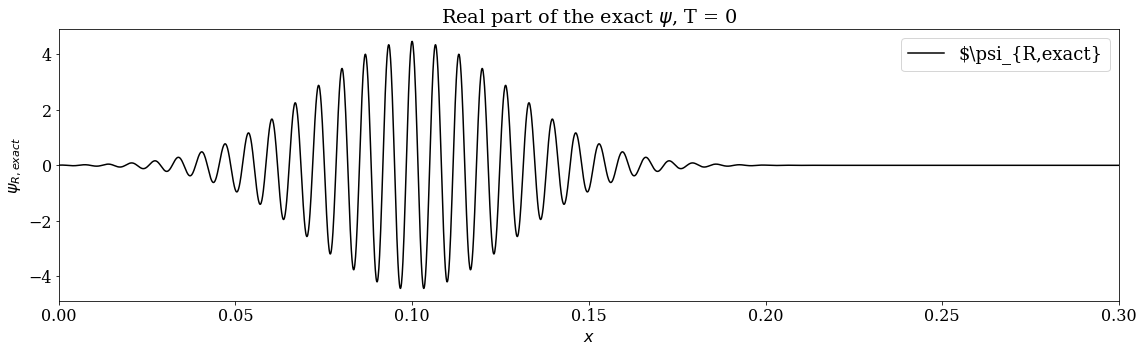

In [152]:
fig = plt.figure(figsize=(19, 5))
plt.title("Real part of the exact $\psi$, T = 0")
plt.xlabel("$x$")
plt.ylabel("$\psi_{R,exact}$")
plt.xlim((0, 0.3))
plt.plot(x_vec, np.real(waveform_exact), "black", label=r"$\psi_{R,exact}")
plt.legend(loc=1, fontsize=18)

And then we zoom in the interval $[0.7, 1]$, to better seeing the exact waveform shape at $t=8$, namley at the end of the simulation.

In [157]:
waveform_exact = np.asarray([waveform_exac_lamb(2*np.pi, xi-x0, T, M, sigma0, p0, i, hbar) for xi in x_vec])

print("Total probability distribution: {}".format(np.sum(np.abs(waveform_exact)**2)*dx))

Total probability distribution: 0.9997124752279084


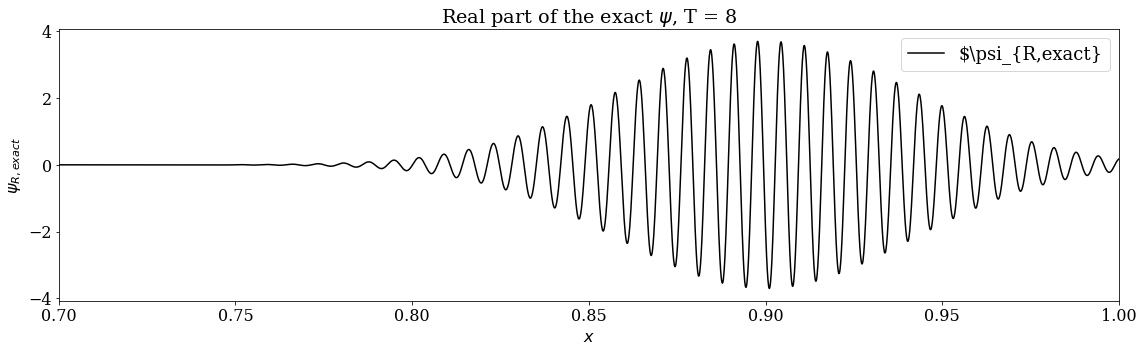

In [158]:
fig = plt.figure(figsize=(19, 5))
plt.title("Real part of the exact $\psi$, T = 8")
plt.xlabel("$x$")
plt.ylabel("$\psi_{R,exact}$")
plt.xlim((0.7, 1))
plt.plot(x_vec, np.real(waveform_exact), "black", label=r"$\psi_{R,exact}")
plt.legend(loc=1, fontsize=18)

Compute the probability density function for the exact solution.

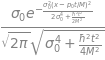

In [159]:
_2pi, x, t, M_, sigma_0, p_0, h_bar = sp.symbols('2\pi x t M \sigma_0 p_0 hbar')

P_symbolic = (sigma_0/sp.sqrt(_2pi)) *\
             ( (sp.exp((- (sigma_0**2*(x-((p_0*t)/(M_)))**2) / (2*(sigma_0**4+((t**2*h_bar**2)/(4*M_**2))))))) / \
               (sp.sqrt(sigma_0**4+((t**2*h_bar**2)/(4*M_**2)))) )

P_symbolic

In [160]:
P_lamb = lambdify((_2pi, x, t, M_, sigma_0, p_0, h_bar), P_symbolic)

In [161]:
P = np.asarray([P_lamb(2*np.pi, xi-x0, T, M, sigma0, p0, hbar) for xi in x_vec])
P

array([6.73710258e-208, 7.49482532e-208, 8.33767048e-208, ...,
       3.76879933e-002, 3.72449412e-002, 3.68066616e-002])

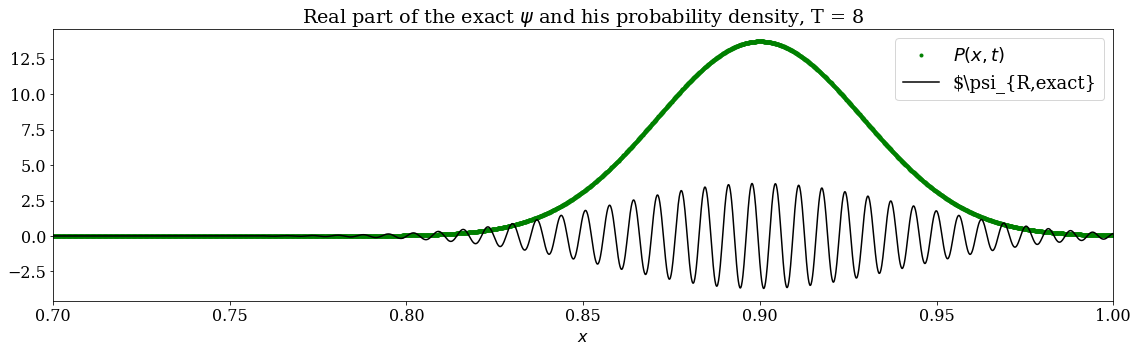

In [162]:
fig = plt.figure(figsize=(19, 5))
plt.title("Real part of the exact $\psi$ and his probability density, T = 8")
plt.xlabel("$x$")
plt.xlim((0.7, 1))
plt.plot(x_vec, P, "g.", label=r"$P(x,t)$")
plt.plot(x_vec, np.real(waveform_exact), "black", label=r"$\psi_{R,exact}")
plt.legend(loc=1, fontsize=18)

#### Calculating $L_2$ norm
To check that the simulation converges as $\Delta t\rightarrow 0.$, and to verify the order of convergence, we use the $L_2$ norm. Therefore, to compare solutions, we will use the distance between them normalized by the norm of the exact solution, as follows

\begin{equation}
error = \frac{||{T - T_{exact}}||_2}{||T_{exact}||_2}
\end{equation}

In [163]:
def L2_error (S_num , S_exact ) :
  """ Computes L2 norm of error

  Parameters
  ----------
  S_num   : array of float
             Array with numerical solution
  S_exact : array of float
             Array with exact solution
  
  Return
  -------
  error : L2 norm of error
  """
  
  error = np.sqrt(np.sum((S_num - S_exact)**2)/np.sum(S_exact)**2)
  return error


So, let's compute the distance between the numerical solution and the exact solution once the evolution is complete ($T=0$).

In [165]:
L2_error(waveform.psi, waveform_exact)

(0.15433130648840943+0.16381435463803176j)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


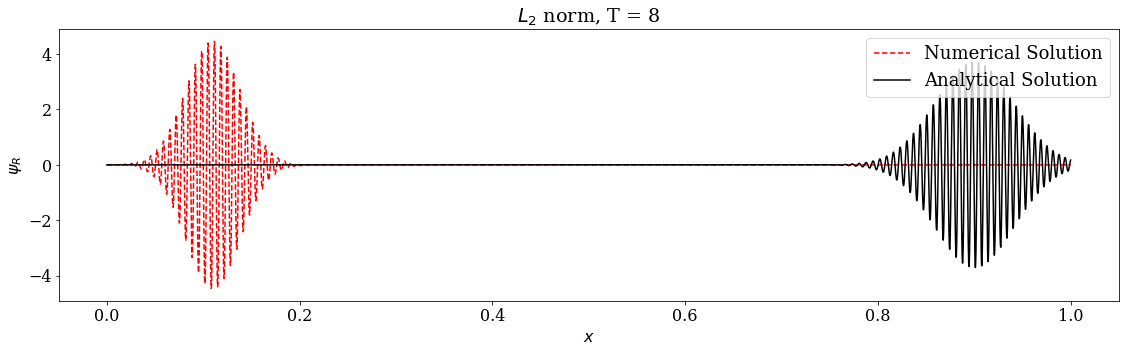

In [166]:
fig = plt.figure(figsize=(19, 5))
plt.title("$L_2$ norm, T = 8")
plt.xlabel("$x$")
plt.ylabel("$\psi_{R}$")
plt.plot(x_vec, waveform.psi, "r--", label=r"$\psi_{R,num}$")
plt.plot(x_vec, np.real(waveform_exact), "black", label=r"$\psi_{R,exact}")
plt.legend(['Numerical Solution', 'Analytical Solution'], loc=1, fontsize=18)

Obviously the two solutions are very distant from each other since the numerical solution fails to evolve.

### Repeat the comparison for different $\Delta t$ values and check the convergence

In [ ]:
convDeltaT = np.asarray([9e-5, 1e-5, 1e-6, 1e-7, 1e-8])

psi_list = []

for Dt in convDeltaT:
    newWaveform = Waveform(psi0)
    newWaveform.ftcs(nt, Dt, dx, M, hbar, alpha, np.zeros(x_vec.shape))
    psi_list.append(newWaveform)

L2Norm = np.zeros(convDeltaT.shape[0]-1)

for i in range(L2Norm.shape[0]):
    L2Norm[i] = L2_error(psi_list[i], psi_list[-1])

print("L2Norm = ", L2Norm)

#""" # plot of the grid differences from lecture 02_03 
plt.figure(figsize=(6,6))
plt.grid(True)
plt.xlabel('$\Delta t$', fontsize=18)
plt.ylabel('$L_2$-norm of the grid differences', fontsize=18)
plt.axis('equal')
plt.loglog(convDeltaT[:-1], L2Norm, color='k', ls='--', lw=2, marker='o');
plt.show()
#"""

## Assignment 2: use the code for $V\neq 0$

Now that we are confident that our code is not wrong, we carry out the same simulation as before, but this time introducing a non-zero potential, which has the following shape

\begin{eqnarray}
V(x) = 0\quad &\textrm{for}& x \in [0.0, 5.0\times 10^{-1} m)\\
V(x) = V_0\quad &\textrm{for}& x \in [5.0\times 10^{-1} m, 5.5\times 10^{-1} m]\\
V(x) = 0\quad &\textrm{for}& x \in (5.5\times 10^{-1} m, 1 m]
\end{eqnarray}

To choose the value of $V_0$, let us point out that the kinetic energy of our particle, which is coming from the left side, is

\begin{equation}
E_0\sim \frac{p_0^2}{2 M} \simeq 5\times 10^{-33} J 
\end{equation}

Now we want to see what happens for different values of $V_0$, say for
1. $V_0 = - 2\,E_0$
2. $V_0 = - E_0$
3. $V_0 = - \frac{1}{2} E_0$
4. $V_0 = + E_0$
5. $V_0 = + \frac{1}{2} E_0$
6. $V_0 = + 2\,E_0$

For each of these values of $V_0$, the student is asked to simulate the evolution of the wave, and compare the final results.

The method we have adopted is a bit naive, and it might end up being numerically unstable: hence do not be surprised if you have trouble reproducing exactly the results displayed in the following video.

### Resolution 2

This time we have to set also the potential field.

In [178]:
V = np.zeros(x_vec.shape)
V.shape

We define a function to set the value $V_0$ of the potential field.

In [179]:
def setPotential(V_, V_0, x):
  V_[np.where( (x >= 5e-1) & ( x <= 5.5e-1) )] = V_0

Then we define the kinetic energt of the particle.

In [180]:
# setting up particle's kinetic energy
E0 = p0**2/(2*M)
E0

Finally, we can compute the evolution and the behavior of the waveform when it comes into contact with the potential field.

Now we'll do a simulation for each $V_0$ specified in the list of Assignment 2, starting with $V_0 = - 2\,E_0$.

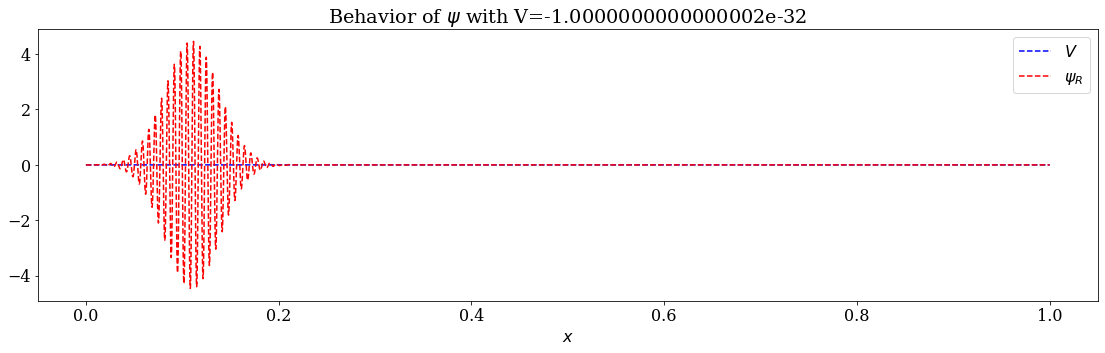

In [185]:
# setting up the potential's shape
V0 = -2*E0
setPotential(V, V0, x_vec)

# setting up initial waveform
waveform_v1 = Waveform(psi0)

# computing waveform evolution
waveform_v1.ftcs(nt, dt, dx, M, hbar, alpha, V)

# plotting the result
waveform_v1.plot(x_vec, 5, V=V, V0=V0)

Now we try to plot for $V_0 = - \frac{1}{2}\,E_0$.

In [ ]:
# setting up the potential's shape
V0 = -.5*E0
setPotential(V, V0, x_vec)

# setting up initial waveform
waveform_v1 = Waveform(psi0)

# computing waveform evolution
waveform_v1.ftcs(nt, dt, dx, M, hbar, alpha, V)

# plotting the result
waveform_v1.plot(x_vec, 5, V=V, V0=V0)

Now we try to plot for $V_0 = E_0$.

In [ ]:
# setting up the potential's shape
V0 = E0
setPotential(V, V0, x_vec)

# setting up initial waveform
waveform_v1 = Waveform(psi0)

# computing waveform evolution
waveform_v1.ftcs(nt, dt, dx, M, hbar, alpha, V)

# plotting the result
waveform_v1.plot(x_vec, 5, V=V, V0=V0)

Now we try to plot for $V_0 = \frac{1}{2}\,E_0$.

In [ ]:
# setting up the potential's shape
V0 = .5*E0
setPotential(V, V0, x_vec)

# setting up initial waveform
waveform_v1 = Waveform(psi0)

# computing waveform evolution
waveform_v1.ftcs(nt, dt, dx, M, hbar, alpha, V)

# plotting the result
waveform_v1.plot(x_vec, 5, V=V, V0=V0)

Now we try to plot for $V_0 = 2\,E_0$.

In [ ]:
# setting up the potential's shape
V0 = 2*E0
setPotential(V, V0, x_vec)

# setting up initial waveform
waveform_v1 = Waveform(psi0)

# computing waveform evolution
waveform_v1.ftcs(nt, dt, dx, M, hbar, alpha, V)

# plotting the result
waveform_v1.plot(x_vec, 5, V=V, V0=V0)

#### Some Final Considerations

Unfortunately it is difficult to compare the solutions found since it's clear that there are numerical errors. In fact, we can see that between the numerical solution of $\psi$ and the potential field there are more than 30 orders of difference. Probably, the error is not due to stability, as we have complied with the CFL condition by keeping the time step $\Delta t$ always below $\Delta x^2 \frac{M}{ħ}$.

I think maybe the error could be due to function normalization problems during the evolution over time since the solution remains stable and evolves correctly if we consider a very small number of time steps.

Tommaso Petrelli

Mat. 305558

Autumn Session project for NuSi 2021-2022

Prof. Andrea Vicerè
.

.

.

---------------------------------------------------------------------------

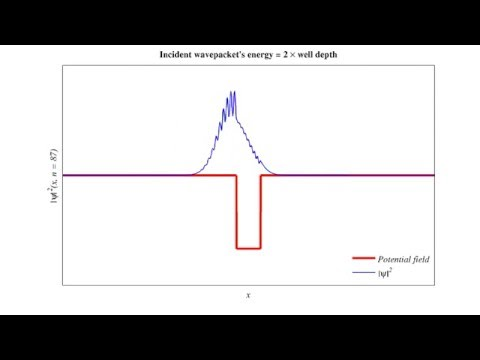

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('cV2fkDscwvY')

## References

Goldberg, Schey and Schwartz, *Computer Generated Motion Pictures of One-Dimensional Quantum-Mechanical Transmission and Reflection Phenomena*, American Journal of Physics **35** (1967) 177-186
http://ergodic.ugr.es/cphys/lecciones/SCHROEDINGER/ajp.pdf